In [45]:
# Import des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Chargement des données
data = pd.read_csv("house_data.csv")

In [3]:
data.head()

,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


In [4]:
# Visualisation des données
data.describe()

,price,surface,arrondissement
count,827.000000,822.000000,822.000000
mean,2007.342201,58.045925,4.142336
std,1890.894229,44.827522,3.202151
min,390.000000,10.000000,1.000000
25%,1050.000000,28.655000,2.000000
50%,1567.000000,46.100000,3.000000
75%,2346.000000,73.000000,4.000000
max,25000.000000,415.000000,10.000000


In [6]:
# On visualise le nombre de lignes avec des valeurs manquantes
print(data.isnull().sum())
print('*******************')
print(data.isna().sum())

price             0
surface           5
arrondissement    5
dtype: int64
*******************
price             0
surface           5
arrondissement    5
dtype: int64


In [7]:
# On supprime les lignes avec des valeurs manquantes comme il n'y en a pas beaucoup
data = data.dropna()

In [8]:
# On vérifie qu'il n'y a plus de lignes avec des valeurs manquantes
data.isnull().sum()

price             0
surface           0
arrondissement    0
dtype: int64

In [12]:
predictors = data
target = data["price"]
del predictors['price']

In [13]:
# Séparation du jeu de données
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.20, random_state = 0)

In [30]:
# Ajustement du training set 
lm = linear_model.LinearRegression(normalize=True)
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=True)

In [31]:
y_pred = lm.predict(x_val)

In [32]:
# On observe les coefficients
print('Coefficients: \n', lm.coef_)

# On observe que la surface est corrélée positivement avec le prix alors que l'arrondissement est corrélé négativement avec le prix.

Coefficients: 
 [ 35.05721428 -26.65129531]


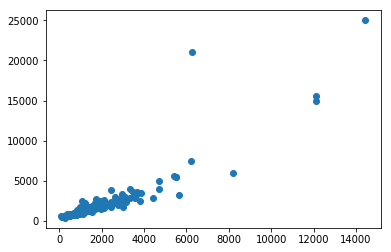

In [33]:
plt.plot(y_pred,y_val, 'o')

In [34]:
# Observation de la précision du modèle

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [35]:
# Avec la régression linéaire

mean_absolute_percentage_error(y_val,y_pred)

# On observe que les données sont prédites avec une précision de 80% environ 

20.285759436454796

In [44]:
# Avec la régression des KNN

neigh = KNeighborsRegressor(n_neighbors=8)
neigh.fit(x_train, y_train)
y_pred_KNN = neigh.predict(x_val)
mean_absolute_percentage_error(y_val,y_pred_KNN)

# On observe une précision de 85% environ.

15.271280443787147

In [ ]:
# Donc le meilleur modèle à prendre est la régression des KNN